In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [35]:
cities = [
    "Bangalore", "Hyderabad", "Mumbai", "Chennai", "Delhi", "Kolkata", "Pune", "Jaipur", "Lucknow",
    "Surat", "Indore", "Chandigarh", "Bhopal", "Patna", "Visakhapatnam", "Nagpur", "Vadodara", "Coimbatore", "Rajkot",
    "Madurai", "Ludhiana", "Kanpur", "Gurgaon", "Faridabad", "Noida", "Meerut", "Mysore", "Nashik",
    "Vijayawada", "Thane", "Guwahati", "Mangalore", "Jamshedpur", "Allahabad", "Amritsar", "Varanasi", "Kochi", "Chandrapur",
    "Srinagar", "Puducherry", "Tirupati", "Jodhpur", "Aurangabad", "Bhubaneswar", "Raipur", "Udaipur", "Shimla", "Dehradun",
    "Agartala", "Belgaum", "Haldia", "Bilaspur", "Kochi", "Kolkata", "Hubli", "Gaya", "Dhanbad", "Ranchi",
    "London", "Manchester", "Liverpool", "Barcelona", "Madrid", "Berlin", "Paris", "Rome", "Sydney", "Melbourne",
    "Cape Town", "Auckland", "Buenos Aires", "Rio de Janeiro", "Dubai", "Kuala Lumpur", "Singapore", "Istanbul", "Tokyo", "Beijing",
    "New York", "Los Angeles", "Chicago", "Mexico City", "São Paulo", "Bogotá", "Cairo", "Johannesburg", "Lagos", "Accra",
    "Moscow", "Berlin", "Bucharest", "Mumbai", "Cape Town", "Dhaka", "Colombo", "Karachi", "Lahore", "Islamabad",
    "Dhaka", "Kathmandu", "Chittagong", "Abu Dhabi", "Doha", "Muscat", "Kuwait City", "Manama", "Riyadh", "Amman",
    "Tunis", "Baghdad", "Casablanca", "Nairobi", "Dar es Salaam", "Lagos", "Kinshasa", "Abidjan", "Lome", "Libreville",
    "Harare", "Pretoria", "Algiers", "Dakar", "Conakry", "Lome", "Santiago", "Montevideo", "Quito", "Asunción",
    "Lima", "Bucharest", "Warsaw", "Athens", "Lisbon", "Brussels", "Copenhagen", "Stockholm", "Oslo", "Zurich",
    "Bengaluru", "Jakarta", "Manila", "Saigon", "Vientiane", "Jakarta", "Bangalore", "Riyadh", "Kuwait City", "Almaty",
    "Tashkent", "Yerevan", "Tbilisi", "Sarajevo", "Belgrade", "Skopje", "Zagreb", "Podgorica", "Astana", "Baku",
    "Dubai", "Hong Kong", "Shanghai", "Seoul", "Chengdu", "Bangkok", "Lima", "Quito", "Helsinki", "Warsaw",
    "Mexico City", "Madrid", "Porto Alegre", "Belo Horizonte", "Curitiba", "Florianópolis", "Wellington", "Christchurch", "Perth", "Brisbane",
    "Colombo", "Chennai", "Bhubaneswar", "Rajkot", "Ahmedabad", "Guwahati", "Jammu", "Bangalore", "Vishakhapatnam", "Ranchi",
    "Mysore", "Kolkata", "Delhi", "Chandigarh", "Jaipur", "Nagpur", "Kochi", "Chennai", "Indore", "Pune", "Agra"
]

In [36]:
api_key = "a6fb4c6108cc9ed3935ab91607e1404b" 

In [37]:
weather_data = []

for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    
    response = requests.get(url)
    data = response.json()
    
    if data["cod"] == 200:
        city_weather = {
            "City": city,
            "Temperature (°C)": data["main"]["temp"],
            "Humidity (%)": data["main"]["humidity"],
            "Pressure (hPa)": data["main"]["pressure"],
            "Wind Speed (m/s)": data["wind"]["speed"],
            "Weather": data["weather"][0]["description"],
            "Latitude": data["coord"]["lat"],
            "Longitude": data["coord"]["lon"],
            "Rainfall (mm)": data.get("rain", {}).get("1h", 0)  
        }
        weather_data.append(city_weather)
    else:
        print(f"Data not found for {city}")

time = datetime.now()
current_time = time.strftime("%Y-%m-%d %H:%M:%S")

weather_df = pd.DataFrame(weather_data)
weather_df.to_excel("weather_data.xlsx", index=False)

print(f"The weather report, recorded on {current_time}, has been saved to 'weather_data.xlsx'.")

The weather report, recorded on 2025-04-04 14:48:17, has been saved to 'weather_data.xlsx'.


In [38]:
print(weather_df.describe())

       Temperature (°C)  Humidity (%)  Pressure (hPa)  Wind Speed (m/s)  \
count        199.000000    199.000000      199.000000        199.000000   
mean          26.994121     44.050251     1011.597990          3.914271   
std            9.555085     27.419994        5.459603          2.145175   
min            2.750000      5.000000      988.000000          0.270000   
25%           19.055000     18.500000     1008.000000          2.290000   
50%           29.410000     43.000000     1010.000000          3.540000   
75%           35.885000     67.000000     1015.000000          5.240000   
max           40.800000     98.000000     1030.000000          9.880000   

         Latitude   Longitude  Rainfall (mm)  
count  199.000000  199.000000     199.000000  
mean    19.443119   48.445839       0.178593  
std     22.154986   55.782468       1.468725  
min    -43.533300 -118.243700       0.000000  
25%     12.120250   17.021200       0.000000  
50%     22.916700   73.691800       0.0000

In [41]:
numerical_columns = ['Temperature (°C)', 'Humidity (%)', 'Pressure (hPa)', 'Wind Speed (m/s)', 'Rainfall (mm)']
result = []
for column in numerical_columns:
    min_city_index = weather_df[column].idxmin()  
    min_value = weather_df[column].min()          
    max_city_index = weather_df[column].idxmax() 
    max_value = weather_df[column].max()        

    min_city = weather_df.loc[min_city_index, 'City']
    max_city = weather_df.loc[max_city_index, 'City']
    
    result.append([column, min_city, min_value, max_city, max_value])

result_df = pd.DataFrame(result, columns=['Parameter', 'City', 'Min Value', 'City', 'Max Value'])

print(result_df)

          Parameter       City  Min Value          City  Max Value
0  Temperature (°C)    Chicago       2.75     Ahmedabad      40.80
1      Humidity (%)     Meerut       5.00      Curitiba      98.00
2    Pressure (hPa)     Astana     988.00  Buenos Aires    1030.00
3  Wind Speed (m/s)     Berlin       0.27        Astana       9.88
4     Rainfall (mm)  Bangalore       0.00     Bucharest      14.55


In [42]:
hottest_cities = weather_df.sort_values(by="Temperature (°C)", ascending=False).head(10)
coldest_cities = weather_df.sort_values(by="Temperature (°C)", ascending=True).head(10)
most_humid_cities = weather_df.sort_values(by="Humidity (%)", ascending=False).head(10)
least_humid_cities = weather_df.sort_values(by="Humidity (%)", ascending=True).head(10)
most_rainfall_cities = weather_df.sort_values(by="Rainfall (mm)", ascending=False).head(10)
least_rainfall_cities = weather_df.sort_values(by="Rainfall (mm)", ascending=True).head(10)

In [43]:
print("Top 10 Hottest Cities:")
print(hottest_cities[["City", "Temperature (°C)"]])

Top 10 Hottest Cities:
          City  Temperature (°C)
182  Ahmedabad             40.80
35    Varanasi             40.00
16    Vadodara             39.96
21      Kanpur             39.83
13       Patna             39.80
33   Allahabad             39.59
41     Jodhpur             39.51
198       Agra             39.21
48    Agartala             39.21
8      Lucknow             39.18


In [44]:
print("\nTop 10 Coldest Cities:")
print(coldest_cities[["City", "Temperature (°C)"]])


Top 10 Coldest Cities:
             City  Temperature (°C)
80        Chicago              2.75
135     Stockholm              7.25
136          Oslo              7.36
166      Helsinki              7.78
79    Los Angeles              8.27
165         Quito              8.70
126         Quito              8.70
70   Buenos Aires              9.55
151      Sarajevo             10.22
83         Bogotá             10.95


In [45]:
print("\nTop 10 Most Humid Cities:")
print(most_humid_cities[["City", "Humidity (%)"]])


Top 10 Most Humid Cities:
               City  Humidity (%)
172        Curitiba            98
82        São Paulo            96
69         Auckland            96
83           Bogotá            94
174      Wellington            93
73     Kuala Lumpur            91
74        Singapore            91
71   Rio de Janeiro            91
126           Quito            89
65             Rome            89


In [46]:
print("\nTop 10 Least Humid Cities:")
print(least_humid_cities[["City", "Humidity (%)"]])


Top 10 Least Humid Cities:
          City  Humidity (%)
25      Meerut             5
41     Jodhpur             5
22     Gurgaon             6
7       Jaipur             6
23   Faridabad             6
24       Noida             6
4        Delhi             6
99   Kathmandu             6
192     Jaipur             6
190      Delhi             6


In [47]:
print("\nTop 10 Most Rainfall Cities:")
print(most_rainfall_cities[["City", "Rainfall (mm)"]])


Top 10 Most Rainfall Cities:
               City  Rainfall (mm)
90        Bucharest          14.55
129       Bucharest          14.55
152        Belgrade           2.71
71   Rio de Janeiro           1.13
112   Dar es Salaam           0.66
73     Kuala Lumpur           0.64
78         New York           0.56
74        Singapore           0.42
111         Nairobi           0.32
9             Surat           0.00


In [48]:
print("\nTop 10 Least Rainfall Cities:")
print(least_rainfall_cities[["City", "Rainfall (mm)"]])


Top 10 Least Rainfall Cities:
        City  Rainfall (mm)
0  Bangalore            0.0
1  Hyderabad            0.0
2     Mumbai            0.0
3    Chennai            0.0
4      Delhi            0.0
5    Kolkata            0.0
6       Pune            0.0
7     Jaipur            0.0
8    Lucknow            0.0
9      Surat            0.0


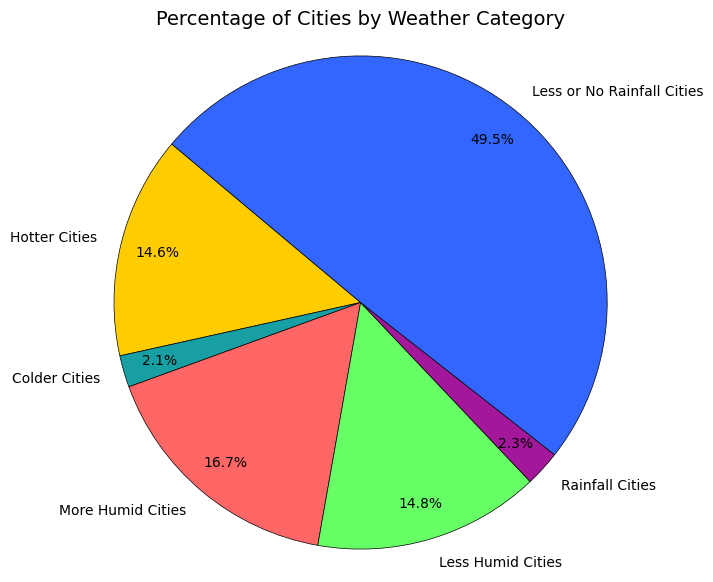

In [49]:
# pie chart for parameters

hottest_cities_pie = weather_df[weather_df["Temperature (°C)"] > 35].sort_values(by="Temperature (°C)", ascending=False)
coldest_cities_pie = weather_df[weather_df["Temperature (°C)"] < 10].sort_values(by="Temperature (°C)", ascending=True)
most_humid_cities_pie = weather_df[weather_df["Humidity (%)"] > 60].sort_values(by="Humidity (%)", ascending=False)
least_humid_cities_pie = weather_df[weather_df["Humidity (%)"] < 20].sort_values(by="Humidity (%)", ascending=True)
most_rainfall_cities_pie = weather_df[weather_df["Rainfall (mm)"] > 0].sort_values(by="Rainfall (mm)", ascending=False)
least_rainfall_cities_pie = weather_df[weather_df["Rainfall (mm)"] <= 0].sort_values(by="Rainfall (mm)", ascending=True)

total_cities = len(cities)

hotter_count = len(hottest_cities_pie)
colder_count = len(coldest_cities_pie)
most_humid_count = len(most_humid_cities_pie)
least_humid_count = len(least_humid_cities_pie)
most_rainfall_count = len(most_rainfall_cities_pie)
least_rainfall_count = len(least_rainfall_cities_pie)

categories = ['Hotter Cities', 'Colder Cities', 'More Humid Cities', 'Less Humid Cities', 'Rainfall Cities', 'Less or No Rainfall Cities']
counts = [hotter_count, colder_count, most_humid_count, least_humid_count, most_rainfall_count, least_rainfall_count]

plt.figure(figsize=(7, 7))
plt.pie(counts, labels=categories,autopct='%1.1f%%', startangle=140, 
        colors=['#ffcc00', '#179fa3', '#ff6666', '#66ff66', '#a3179a', '#3366ff', '#ff9966'],
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}, pctdistance=0.85) 

plt.title('Percentage of Cities by Weather Category', fontsize=14)
plt.axis('equal')

plt.show()


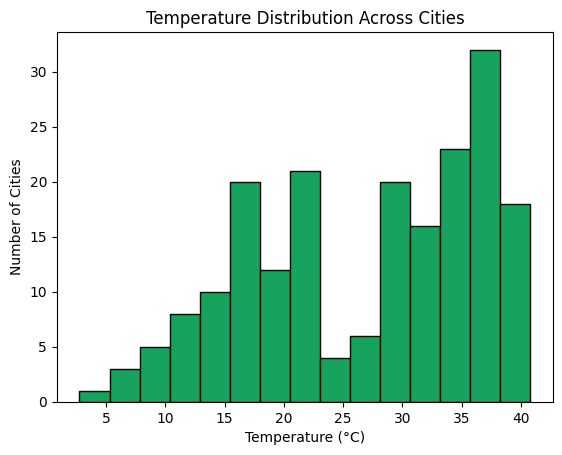

In [50]:
# Histogram for temperature distribution

plt.hist(weather_df['Temperature (°C)'], bins=15, color='#17a35d', edgecolor='black')
plt.title('Temperature Distribution Across Cities')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Cities')
plt.show()

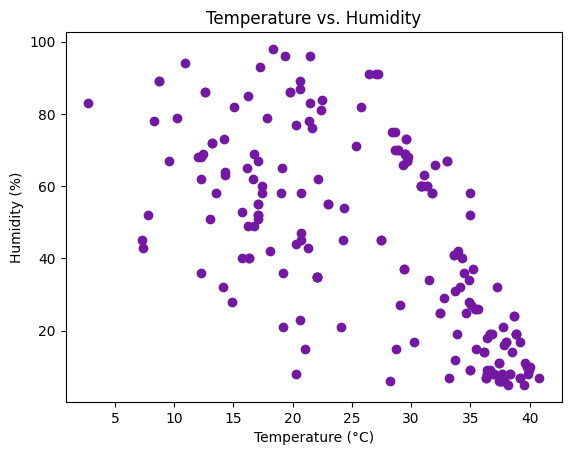

In [51]:
# Scatter plot: Temperature vs Humidity

plt.scatter(weather_df['Temperature (°C)'], weather_df['Humidity (%)'], color='#7417a3')
plt.title('Temperature vs. Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()

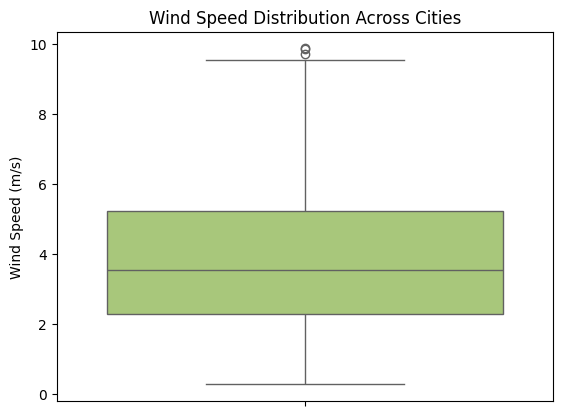

In [52]:
# Box plot for Wind Speed

sns.boxplot(data=weather_df['Wind Speed (m/s)'], color='#abd46e')
plt.title('Wind Speed Distribution Across Cities')
plt.ylabel('Wind Speed (m/s)')
plt.show()

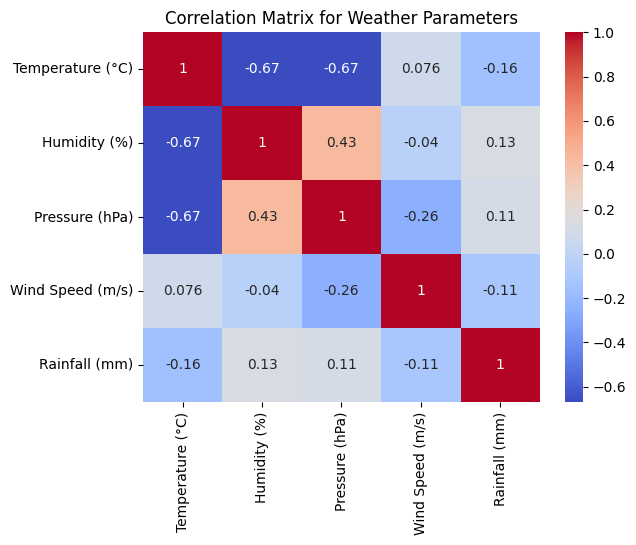

In [53]:
# Correlation heatmap

correlation_matrix = weather_df[['Temperature (°C)', 'Humidity (%)', 'Pressure (hPa)', 'Wind Speed (m/s)', 'Rainfall (mm)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Weather Parameters')
plt.show()

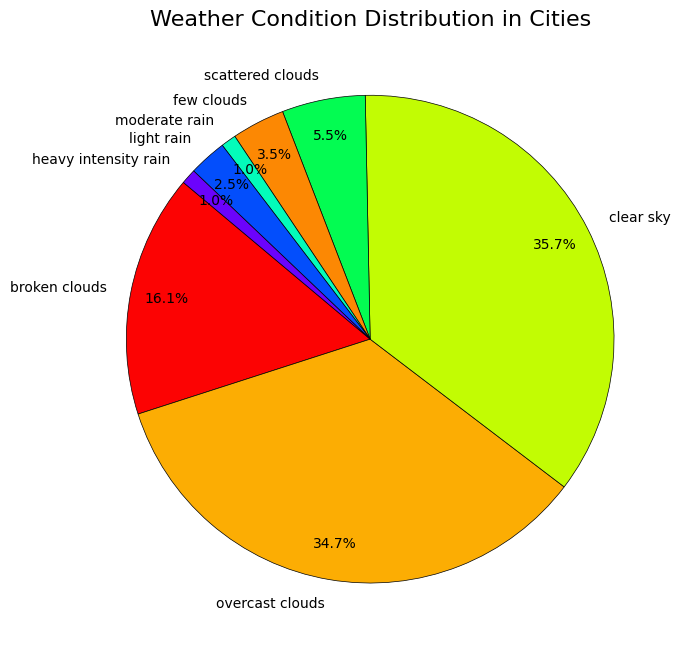

In [54]:
# pie chart for weather conditions

weather_conditions = {}
for city_weather in weather_data:
    weather = city_weather["Weather"]
    if weather in weather_conditions:
        weather_conditions[weather] += 1
    else:
        weather_conditions[weather] = 1

labels = weather_conditions.keys()
sizes = weather_conditions.values()

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, 
        colors=['#fc0303', '#fcad03', '#c2fc03', '#03fc52', '#fc8803', '#03fcba','#034efc','#6b03fc','#5d98cf','#c95dcf','#73303b'],
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5, 'linestyle': 'solid'},pctdistance=0.85)  # Add edge color and linewidth to wedges
plt.tight_layout()  
plt.title('Weather Condition Distribution in Cities', fontsize=16) 
plt.show()
